In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/US_Lightning_Forest_Fires.csv')

In [5]:
df

,Unnamed: 0,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,0,1,2004,05-12-2004,845.0,Lightning,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,1,3,2004,06-28-2004,1600.0,Lightning,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2,4,2004,06-28-2004,1600.0,Lightning,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,3,5,2004,06-30-2004,1800.0,Lightning,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,4,6,2004,07-01-2004,1800.0,Lightning,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99706,99706,209952,1999,09-21-1999,1900.0,Lightning,NaN,NaN,0.10,A,42.151300,-116.243700,ID,NaN,NaN
99707,99707,209958,1992,06-05-1992,1130.0,Lightning,0.0,1900.0,8.00,B,40.616600,-115.634200,NV,NaN,NaN
99708,99708,209961,1993,08-07-1993,1529.0,Lightning,0.0,1900.0,0.50,B,40.051000,-115.052800,NV,NaN,NaN
99709,99709,209962,1992,10-27-1992,1340.0,Lightning,0.0,1730.0,0.10,A,39.683500,-119.365700,NV,NaN,NaN


In [6]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                     0
index                          0
FIRE_YEAR                      0
Fire_Date                      0
DISCOVERY_TIME                 2
STAT_CAUSE_DESCR               0
Days_to_extinguish_fire      141
CONT_TIME                    212
FIRE_SIZE                      0
FIRE_SIZE_CLASS                0
LATITUDE                       0
LONGITUDE                      0
STATE                          1
FIPS_CODE                  62721
FIPS_NAME                  62721
dtype: int64


In [7]:
# Display basic information about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99711 entries, 0 to 99710
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               99711 non-null  int64  
 1   index                    99711 non-null  int64  
 2   FIRE_YEAR                99711 non-null  int64  
 3   Fire_Date                99711 non-null  object 
 4   DISCOVERY_TIME           99709 non-null  float64
 5   STAT_CAUSE_DESCR         99711 non-null  object 
 6   Days_to_extinguish_fire  99570 non-null  float64
 7   CONT_TIME                99499 non-null  float64
 8   FIRE_SIZE                99711 non-null  float64
 9   FIRE_SIZE_CLASS          99711 non-null  object 
 10  LATITUDE                 99711 non-null  float64
 11  LONGITUDE                99711 non-null  float64
 12  STATE                    99710 non-null  object 
 13  FIPS_CODE                36990 non-null  float64
 14  FIPS_NAME             

In [8]:
# Display the first few rows of the DataFrame
print(df.head())


   Unnamed: 0  index  FIRE_YEAR   Fire_Date  DISCOVERY_TIME STAT_CAUSE_DESCR  \
0           0      1       2004  05-12-2004           845.0        Lightning   
1           1      3       2004  06-28-2004          1600.0        Lightning   
2           2      4       2004  06-28-2004          1600.0        Lightning   
3           3      5       2004  06-30-2004          1800.0        Lightning   
4           4      6       2004  07-01-2004          1800.0        Lightning   

   Days_to_extinguish_fire  CONT_TIME  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE  \
0                      0.0     1530.0       0.25               A  38.933056   
1                      5.0     1400.0       0.10               A  38.559167   
2                      5.0     1200.0       0.10               A  38.559167   
3                      1.0     1600.0       0.10               A  38.635278   
4                      1.0     1400.0       0.10               A  38.688333   

    LONGITUDE STATE  FIPS_CODE  FIPS_NAME  


In [9]:
# Display descriptive statistics
print(df.describe())

         Unnamed: 0          index     FIRE_YEAR  DISCOVERY_TIME  \
count  99711.000000   99711.000000  99711.000000    99709.000000   
mean   49855.000000   93613.538326   1999.808075     1404.288871   
std    28784.230683   54894.309789      5.067092      389.698239   
min        0.000000       1.000000   1992.000000        0.000000   
25%    24927.500000   46085.000000   1995.000000     1128.000000   
50%    49855.000000   92152.000000   2000.000000     1442.000000   
75%    74782.500000  139608.500000   2004.000000     1700.000000   
max    99710.000000  209963.000000   2009.000000     2359.000000   

       Days_to_extinguish_fire     CONT_TIME      FIRE_SIZE      LATITUDE  \
count             99570.000000  99499.000000   99711.000000  99711.000000   
mean                  2.886472   1526.632348     144.818170     40.632089   
std                  11.372058    441.562369    3045.659572      5.048348   
min                -210.000000      0.000000       0.010000     26.150400   
25

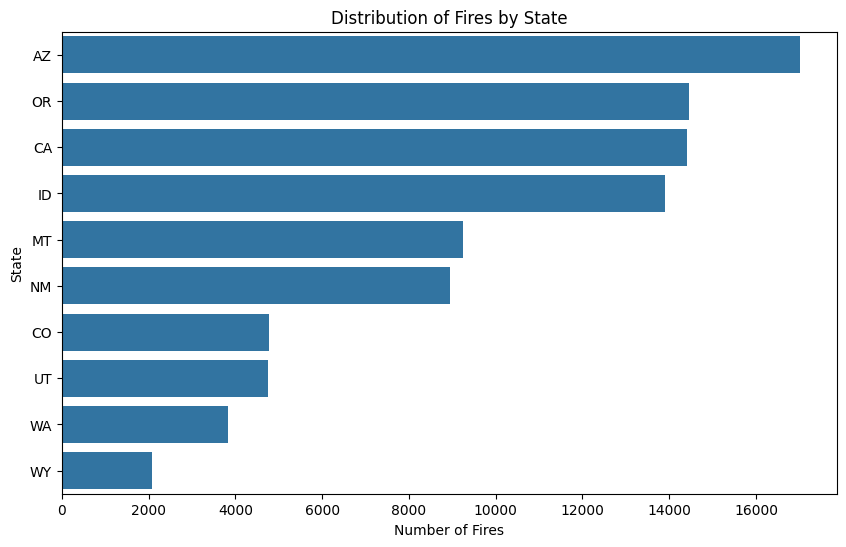

In [10]:
# Display the distribution of a STATE column
plt.figure(figsize=(10, 6))
sns.countplot(y='STATE', data=df, order=df['STATE'].value_counts().index[:10]) # Top 10 states
plt.title('Distribution of Fires by State')
plt.xlabel('Number of Fires')
plt.ylabel('State')
plt.show()

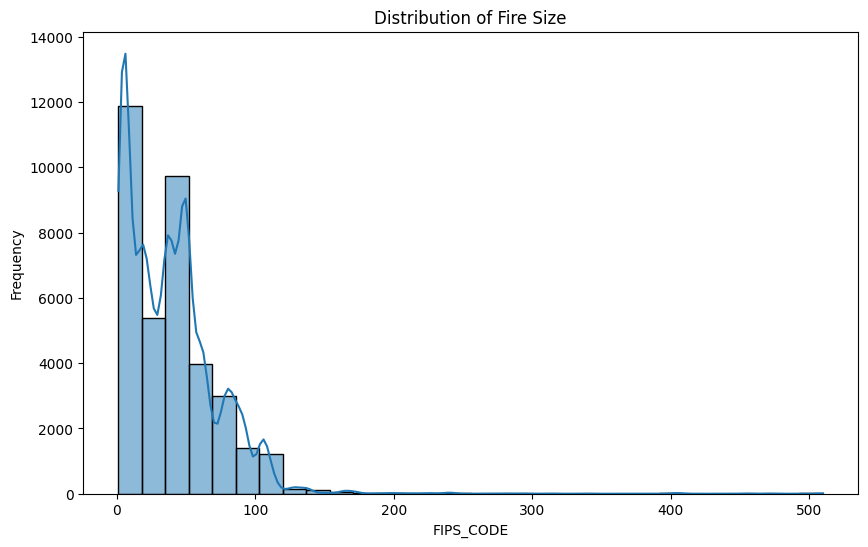

In [11]:
# Display the distribution of a FIPS_CODE column
plt.figure(figsize=(10, 6))
sns.histplot(df['FIPS_CODE'], bins=30, kde=True)
plt.title('Distribution of Fire Size')
plt.xlabel('FIPS_CODE')
plt.ylabel('Frequency')
plt.show()


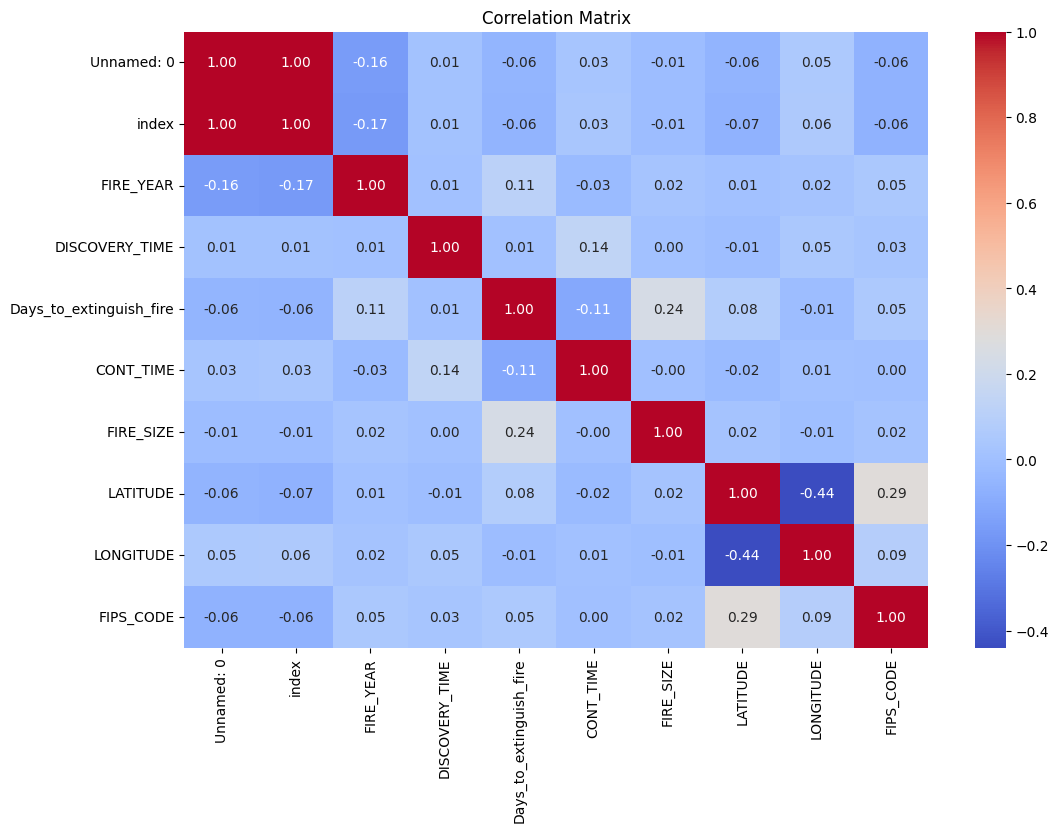

In [12]:
# Display correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
print(df.isnull().sum())

Unnamed: 0                     0
index                          0
FIRE_YEAR                      0
Fire_Date                      0
DISCOVERY_TIME                 2
STAT_CAUSE_DESCR               0
Days_to_extinguish_fire      141
CONT_TIME                    212
FIRE_SIZE                      0
FIRE_SIZE_CLASS                0
LATITUDE                       0
LONGITUDE                      0
STATE                          1
FIPS_CODE                  62721
FIPS_NAME                  62721
dtype: int64


       DISCOVERY_TIME  Days_to_extinguish_fire     CONT_TIME
count    99709.000000             99570.000000  99499.000000
mean      1404.288871                 2.886472   1526.632348
std        389.698239                11.372058    441.562369
min          0.000000              -210.000000      0.000000
25%       1128.000000                 0.000000   1206.500000
50%       1442.000000                 0.000000   1600.000000
75%       1700.000000                 1.000000   1830.000000
max       2359.000000               184.000000   2359.000000


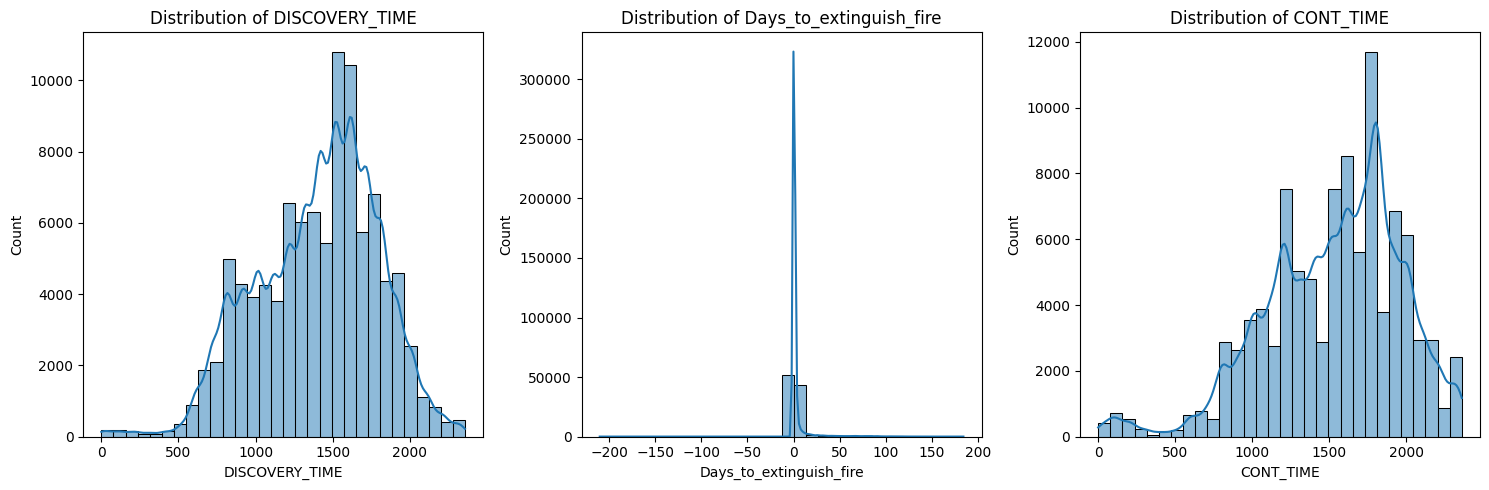

In [14]:
print(df[['DISCOVERY_TIME', 'Days_to_extinguish_fire', 'CONT_TIME']].describe())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['DISCOVERY_TIME'].dropna(), bins=30, kde=True)
plt.title('Distribution of DISCOVERY_TIME')

plt.subplot(1, 3, 2)
sns.histplot(df['Days_to_extinguish_fire'].dropna(), bins=30, kde=True)
plt.title('Distribution of Days_to_extinguish_fire')

plt.subplot(1, 3, 3)
sns.histplot(df['CONT_TIME'].dropna(), bins=30, kde=True)
plt.title('Distribution of CONT_TIME')

plt.tight_layout()
plt.show()

In [15]:
# Drop rows with missing values in FIRE_SIZE, FIRE_SIZE_CLASS, LATITUDE, LONGITUDE, and STATE
df.dropna(subset=['FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'STATE'], inplace=True)

# Impute missing values in DISCOVERY_TIME, Days_to_extinguish_fire, and CONT_TIME with the median
for col in ['DISCOVERY_TIME', 'Days_to_extinguish_fire', 'CONT_TIME']:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Drop the FIPS_CODE and FIPS_NAME columns
df.drop(columns=['FIPS_CODE', 'FIPS_NAME'], inplace=True)

# Verify that the missing values have been handled
print(df.isnull().sum())

Unnamed: 0                 0
index                      0
FIRE_YEAR                  0
Fire_Date                  0
DISCOVERY_TIME             0
STAT_CAUSE_DESCR           0
Days_to_extinguish_fire    0
CONT_TIME                  0
FIRE_SIZE                  0
FIRE_SIZE_CLASS            0
LATITUDE                   0
LONGITUDE                  0
STATE                      0
dtype: int64


/tmp/ipython-input-15-4140090352.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


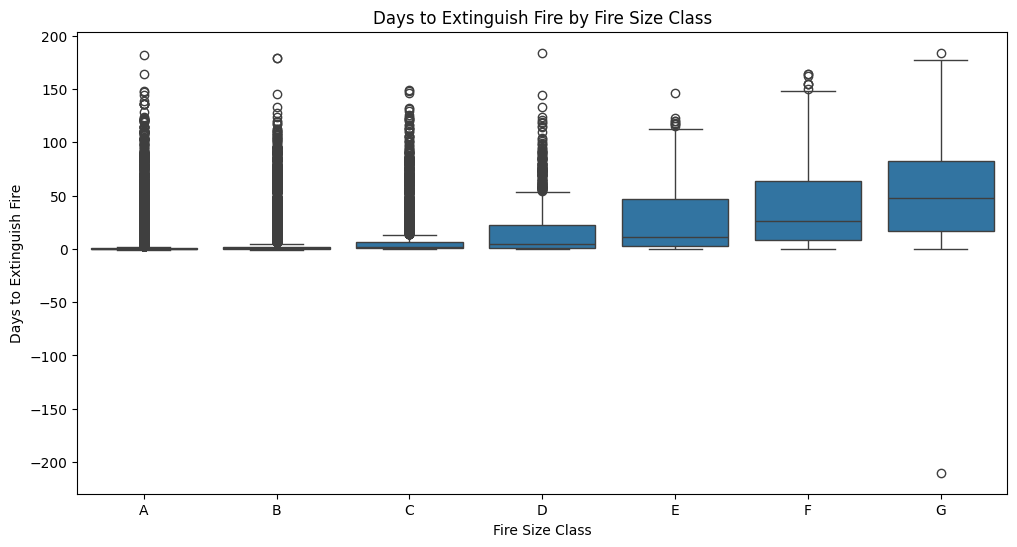

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='FIRE_SIZE_CLASS', y='Days_to_extinguish_fire', data=df, order=sorted(df['FIRE_SIZE_CLASS'].unique()))
plt.title('Days to Extinguish Fire by Fire Size Class')
plt.xlabel('Fire Size Class')
plt.ylabel('Days to Extinguish Fire')
plt.show()

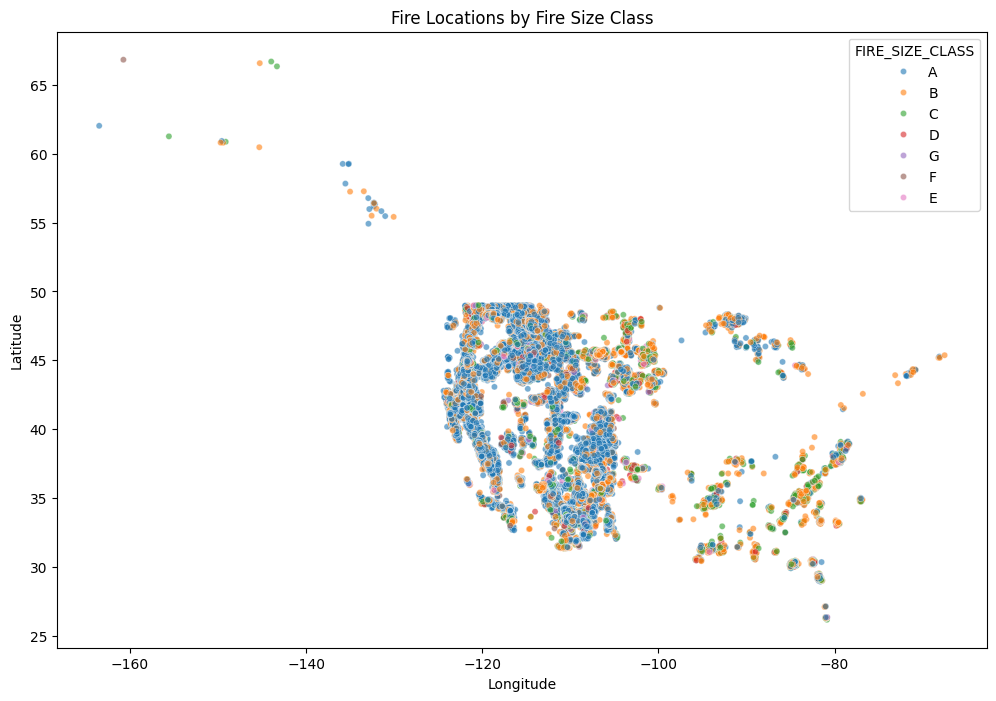

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='FIRE_SIZE_CLASS', data=df, s=20, alpha=0.6)
plt.title('Fire Locations by Fire Size Class')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

visualization

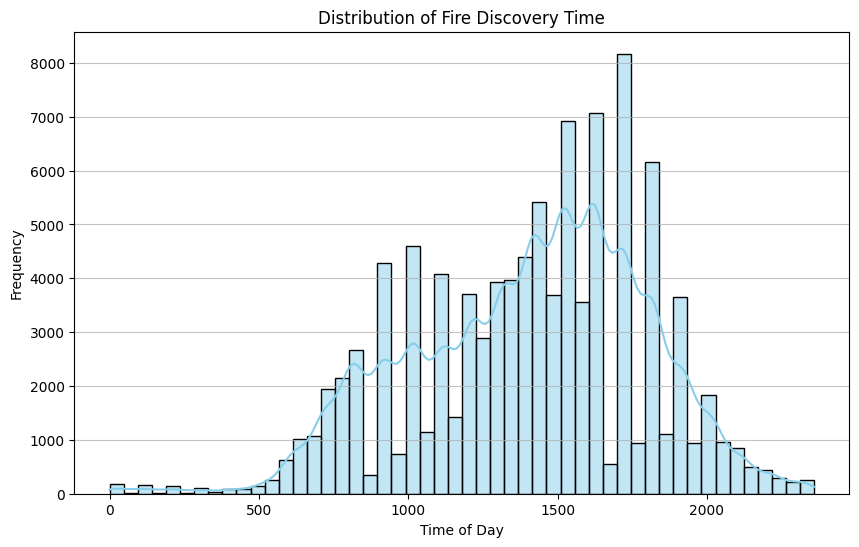

In [20]:
#Distribution of Fire Discovery Time
plt.figure(figsize=(10, 6))
sns.histplot(df['DISCOVERY_TIME'].dropna(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Fire Discovery Time')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

/tmp/ipython-input-22-4239039557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FIRE_SIZE_CLASS', data=df, order=sorted(df['FIRE_SIZE_CLASS'].unique()), palette='viridis')


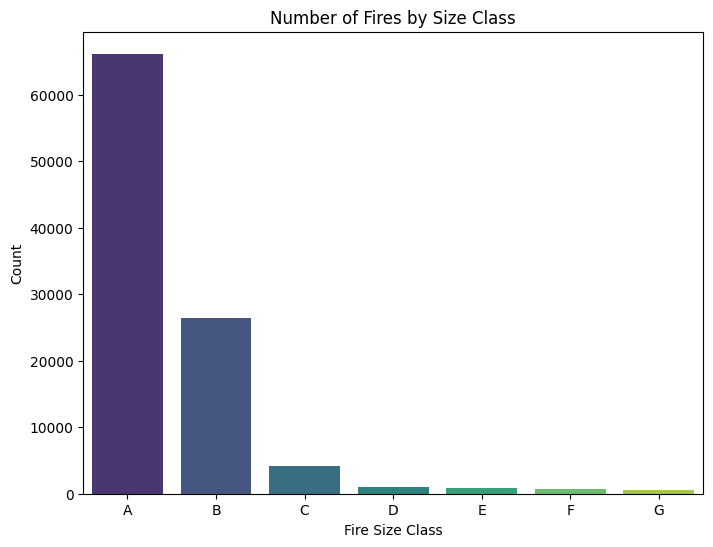

In [22]:
# Count of Fires by Fire Size Class
plt.figure(figsize=(8, 6))
sns.countplot(x='FIRE_SIZE_CLASS', data=df, order=sorted(df['FIRE_SIZE_CLASS'].unique()), palette='viridis')
plt.title('Number of Fires by Size Class')
plt.xlabel('Fire Size Class')
plt.ylabel('Count')
plt.show()



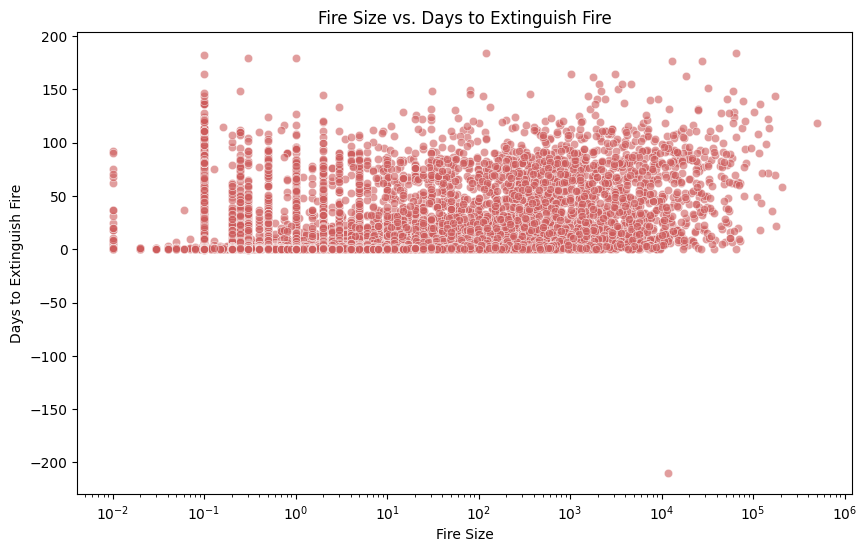

In [23]:
#Scatter Plot of Fire Size vs. Days to Extinguish Fire
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FIRE_SIZE', y='Days_to_extinguish_fire', data=df, alpha=0.6, color='indianred')
plt.title('Fire Size vs. Days to Extinguish Fire')
plt.xlabel('Fire Size')
plt.ylabel('Days to Extinguish Fire')
plt.xscale('log')


/tmp/ipython-input-24-1897817672.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='STATE', y='FIRE_SIZE', data=df[df['STATE'].isin(top_states)], order=top_states, palette='plasma')


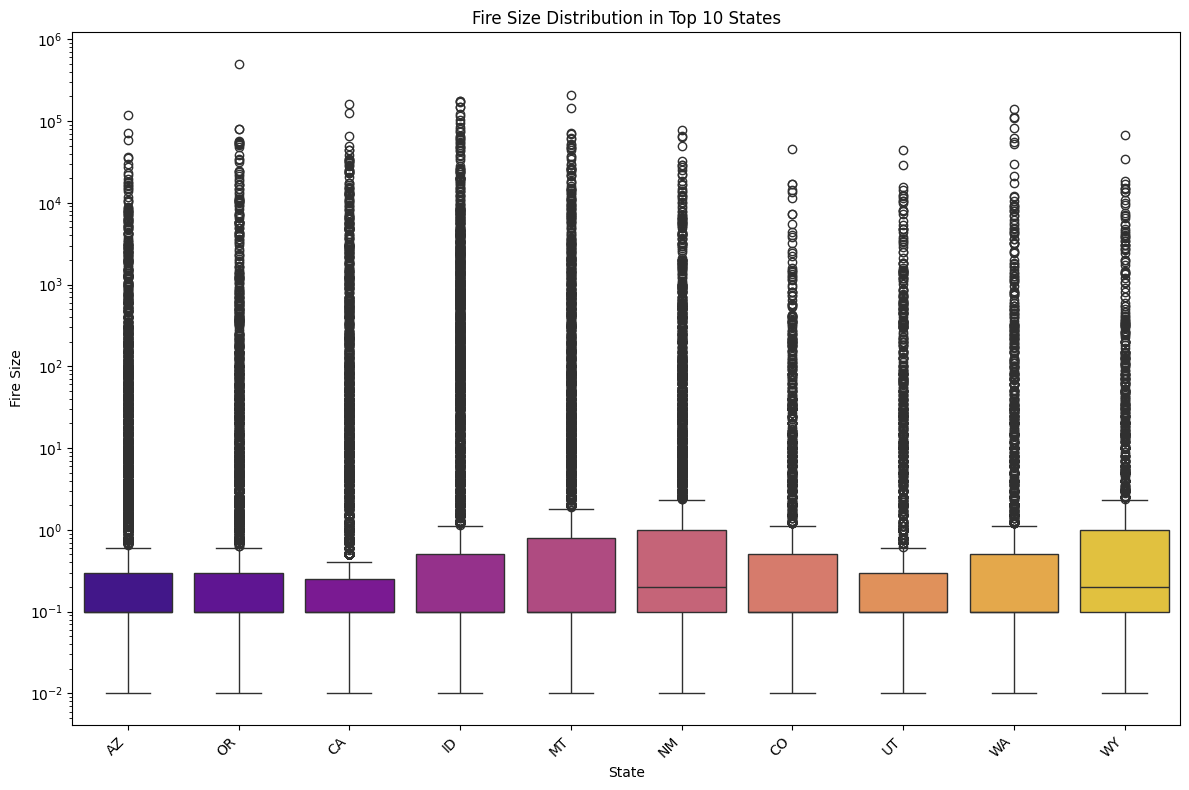

In [24]:

#Box Plot of FIRE_SIZE by STATE (Top 10 States)
plt.figure(figsize=(12, 8))
top_states = df['STATE'].value_counts().nlargest(10).index
sns.boxplot(x='STATE', y='FIRE_SIZE', data=df[df['STATE'].isin(top_states)], order=top_states, palette='plasma')
plt.title('Fire Size Distribution in Top 10 States')
plt.xlabel('State')
plt.ylabel('Fire Size')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


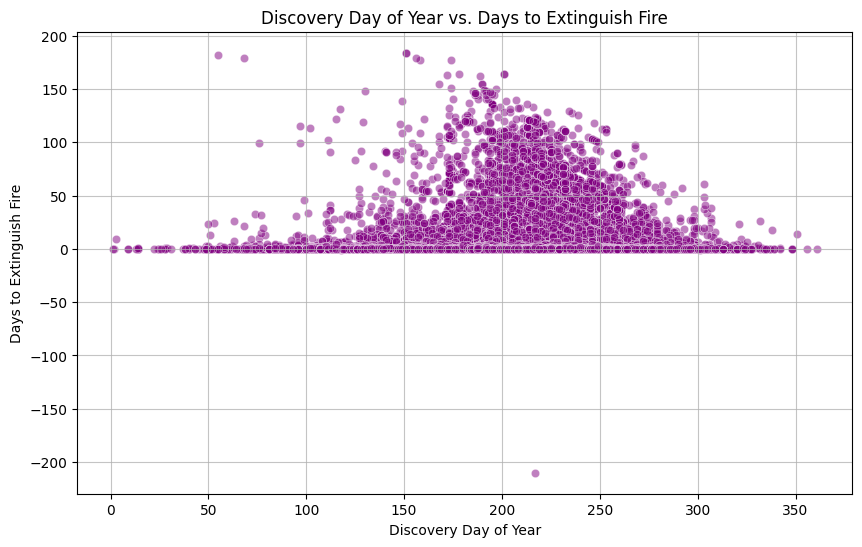

In [26]:
# Relationship between DISCOVERY_DOY and Days to Extinguish Fire

df['Fire_Date'] = pd.to_datetime(df['Fire_Date'])
df['DISCOVERY_DOY'] = df['Fire_Date'].dt.dayofyear

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DISCOVERY_DOY', y='Days_to_extinguish_fire', data=df, alpha=0.5, color='purple')
plt.title('Discovery Day of Year vs. Days to Extinguish Fire')
plt.xlabel('Discovery Day of Year')
plt.ylabel('Days to Extinguish Fire')
plt.grid(axis='both', alpha=0.75)
plt.show()